In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# downloading simulation results:
# see ../simulations

N = 1e6

points = {}
for regime in ['r']:
    
    points[regime] = {}
    points[regime]['fs'] = np.load('../simulations/out/half-rare/%s_fstars.npy' % regime)
    points[regime]['fBs'] = np.load('../simulations/out/half-rare/%s_fB_stars.npy' % regime)
    points[regime]['rs'] = np.load('../simulations/out/half-rare/%s_rs.npy' % regime)
    points[regime]['nums'] = np.load('../simulations/out/half-rare/%s_numers.npy' % regime)
    points[regime]['denoms'] = np.load('../simulations/out/half-rare/%s_denoms.npy' % regime)


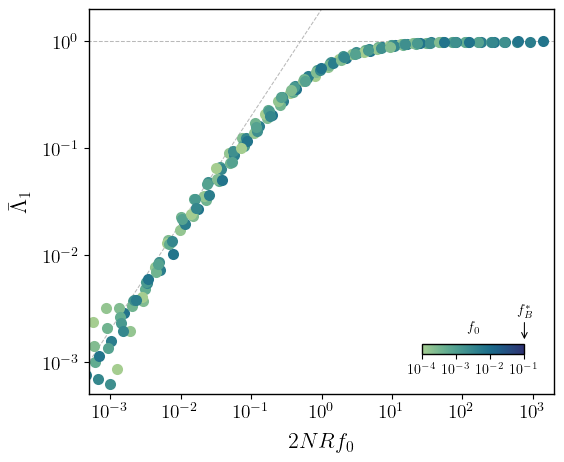

In [5]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(6,5))

cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-4, vmax=-1),cmap=sns.color_palette("crest", as_cmap=True))
grey = '#b9b9b9' 
w = 1.5 # linewidth

# plotting the asymptotics - still need to double-check the prefactor
plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), '--', color=grey, linewidth=w/2)
plt.loglog(np.logspace(-6.5,5,25), [2 * x for x in np.logspace(-6.5,5,25)], '--', color=grey, linewidth=w/2)

# ploting the simulation results
regime = 'r'

# choosing f*_B
j = 1
f_B = points['r']['fBs'][j]

xs = []; ys = []; cs = []
for k, f in enumerate(points[regime]['fs'][:-7]):

    color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
    
    # making sure that one allele is much more frequent
    if f > f_B / 10:
        continue
        
    for i, r in enumerate(points[regime]['rs']):
            
        xs.append(2 * N * r * f)
        ys.append(points[regime]['nums'][i, j, k] / points[regime]['denoms'][i, j, k])
        cs.append(color)
        
    #plt.loglog(xs, ys, 'o', markersize=8, markeredgecolor=color + '00', markerfacecolor=color)        

# reshuffling point before plotting
random.seed(4321)        
idx = sorted(range(len(xs)), key=lambda x: random.random()) 
for i in idx:
    plt.loglog(xs[i], ys[i], 'o', markersize=8, markeredgecolor=cs[i]+'00', markerfacecolor=cs[i]) # label="$s_{A,B} = 10^{-2}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"    
    
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
           ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
           ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
plt.ylim([5e-4, 2])
plt.xlim([5e-4, 2e3])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=14)

plt.ylabel("$\\bar{\\Lambda}_1$", fontsize=16, labelpad=8)
plt.xlabel(r"$2NRf_0$", fontsize=16, labelpad=8)    

cbar_ax = fig.add_axes([0.68, 0.19, 0.17, 0.02])
cbar = plt.colorbar(cmap, alpha=1, cax=cbar_ax, orientation='horizontal', shrink=0.5, ticks=[-4, -3, -2, -1])
cbar.ax.set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$']);
cbar.set_label('$f_0$', labelpad=-40, y=0.45)

# we have chosen f*_B = 0.1 by choosing j = 1
# I couldn't figure out how to correctly position the arrow automatically - 
# be sure to change this part if you change j
cbar_pos = cbar_ax.get_position()
arrow_props = dict(facecolor='black', edgecolor='black', arrowstyle='->', linewidth=0.75)
arrow = plt.annotate(r"$f^*_B$",
                     xy=(cbar_pos.x0 + cbar_pos.width + 0.024, cbar_pos.y1 + 1.5 * cbar_pos.height),
                     xytext=(cbar_pos.x0 + cbar_pos.width + 0.024, cbar_pos.y1 + 0.08),
                     xycoords='figure fraction', textcoords='figure fraction',
                     arrowprops=arrow_props, fontsize=10, ha='center', va='bottom')

plt.savefig('fig8.pdf',dpi=600,bbox_inches='tight') 